In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Connection parameters from environment variables
dbname = os.getenv("POSTGRES_DB")
user = os.getenv("POSTGRES_USER")
password = os.getenv("POSTGRES_PASSWORD")
host = os.getenv("POSTGRES_HOST")
port = os.getenv("POSTGRES_PORT")

# Create sqlalchemy engine
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
engine = create_engine(connection_string)
conn = engine.raw_connection()

In [3]:
query_latest = "SELECT * FROM marts.fct_latest_weather"
df_latest = pd.read_sql_query(query_latest, conn)
df_latest

/tmp/ipykernel_885/1763056777.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_latest = pd.read_sql_query(query_latest, conn)


,lat,lon,latest_observation_time,latest_temperature,latest_wind_speed
0,25.86,-97.42,2026-02-12 19:00:00+00:00,27.03,4.7


In [4]:
query_series = "SELECT * FROM marts.fct_weather_time_series ORDER BY time"
df_series = pd.read_sql_query(query_series, conn)
df_series['time'] = pd.to_datetime(df_series['time'])
df_series.head()

/tmp/ipykernel_885/1479936945.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_series = pd.read_sql_query(query_series, conn)


,lat,lon,time,temperature,humidity,wind_speed,precipitation_probability
0,25.86,-97.42,2026-02-07 20:00:00+00:00,26.85,29,4.7,0
1,25.86,-97.42,2026-02-07 21:00:00+00:00,26.07,36,5.6,0
2,25.86,-97.42,2026-02-07 22:00:00+00:00,24.93,40,6.1,0
3,25.86,-97.42,2026-02-07 23:00:00+00:00,23.23,49,5.9,0
4,25.86,-97.42,2026-02-08 00:00:00+00:00,20.58,61,5.0,0


In [5]:
conn.close()

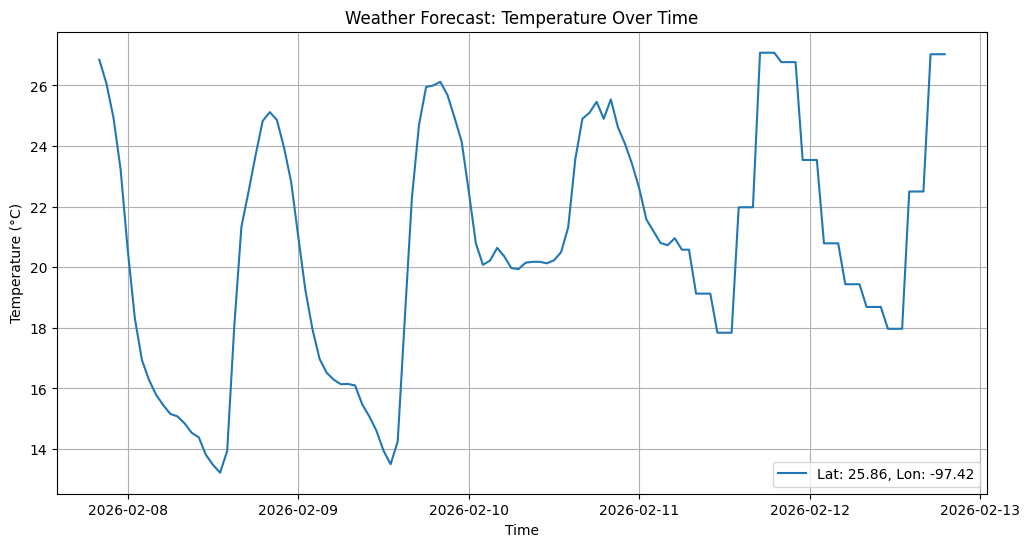

In [6]:
plt.figure(figsize=(12, 6))
for (lat, lon), group in df_series.groupby(['lat', 'lon']):
    plt.plot(group['time'], group['temperature'], label=f"Lat: {lat}, Lon: {lon}")

plt.title("Weather Forecast: Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()